In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# locate to the csv files

%cd /content/gdrive/'My Drive'/'Colab Notebooks'/data/avrio  

/content/gdrive/My Drive/Colab Notebooks/data/avrio


In [3]:
import numpy as np
import pandas as pd
import pywt
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.signal import freqz
from sklearn.preprocessing import normalize 
%matplotlib inline
from scipy import signal
from scipy.signal import decimate
from pywt import  wavedec
from scipy.fft import fftshift
from scipy.fft import fft
import os

In [5]:
df = pd.read_csv('features.csv')

In [6]:
 x = df[['label' , '3_har' , '5_har' , '7_har' ,'9_har', 'v_rms' , 
         'max_power' , 'min_power' , 'power_factor', 'i_rms' , '0,1', ]]
         #'0,2' ,'1,1',  '1,2' , '2,1' ,'3,1']]
 y = x["label"]
 X = x.drop(labels = ["label"], axis = 1)
 print( np.shape(X) , np.shape(y) )

(1339, 10) (1339,)


In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import ExtraTreesClassifier 
# Building the model 

X_train, X_test, y_train, y_test = train_test_split(X, y) 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 4000, 
										criterion ='entropy', max_features = 1  ).fit(X_train, y_train) 
          
extra_tree_forest_predictions = extra_tree_forest.predict(X_test) 

accuracy = extra_tree_forest.score(X_test, y_test) 
print(accuracy * 100)



97.31343283582089


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


   CrossValMeans  CrossValerrors                   Algorithm
0       0.185259        0.013944                         SVC
1       0.816733        0.015936                DecisionTree
2       0.800797        0.021912                    AdaBoost
3       0.953187        0.008964                RandomForest
4       0.977092        0.002988                  ExtraTrees
5       0.768924        0.037849            GradientBoosting
6       0.340637        0.047809     MultipleLayerPerceptron
7       0.529880        0.021912                 KNeighboors
8       0.221116        0.009960          LogisticRegression
9       0.461155        0.006972  LinearDiscriminantAnalysis


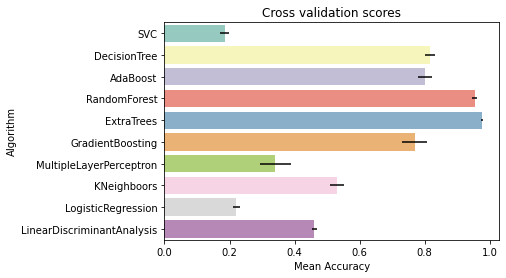

In [8]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


kfold = StratifiedKFold(n_splits=2)

# Modeling step Test differents algorithms 
import seaborn as sns
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores") 
print(cv_res)